In [1]:
%load_ext autoreload

%autoreload 2



In [2]:

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
//Above code disables scrollable cells. This useful while plotting figures that span multiple rows.


<IPython.core.display.Javascript object>

In [3]:
# System Modules

import os
import matplotlib.pyplot as plt
import skvideo.io

import torch
from torch.utils.data import Dataset, ConcatDataset

from data.ImageDataset import ImageDataset
from data.VideoDataset import VideoDataset, VideoWriter
from model import Model, get_device
from network.unet import UNet
from pipelines import Mode
from serde import Experiment
from utils.visualization import play_notebook_video


### Creating an experiment perform predictions using trained model. 

Use the same experiment name that you used for the training.
Note that teh new argument is set to False here.

In [4]:
# Open Experiment
exp = Experiment(name='Combination1', new=False)
cfg_path=exp.params['cfg_path']

# Initialize Model
model = Model(exp,net=UNet)
model.load_trained_model()

### Generate test set from simulation and run model for prediction

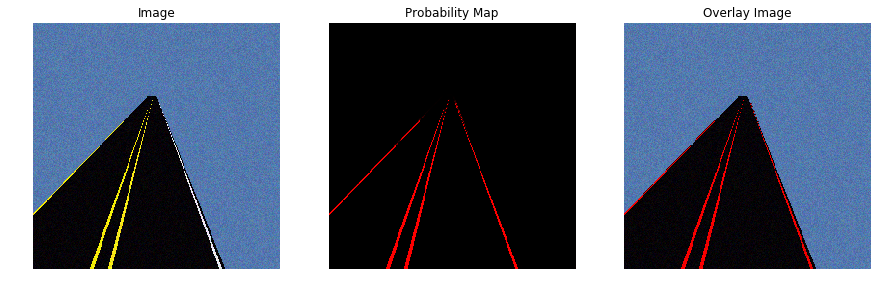

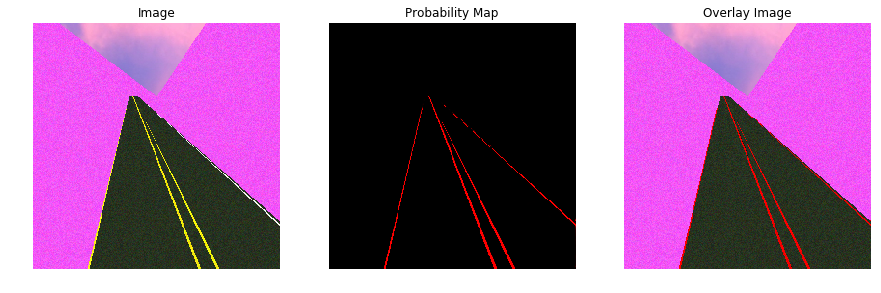

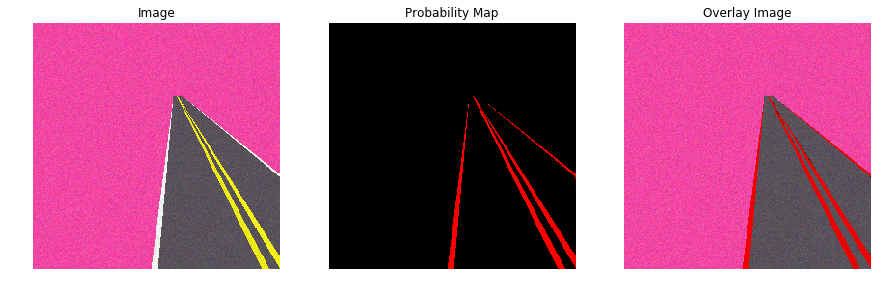

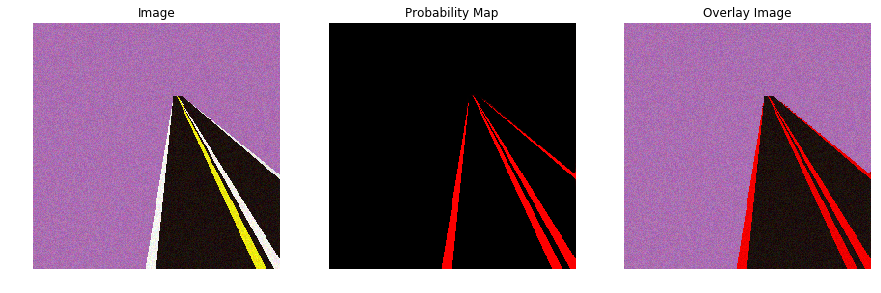

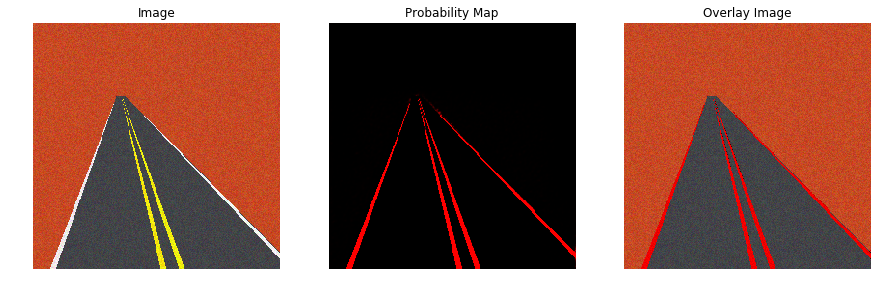

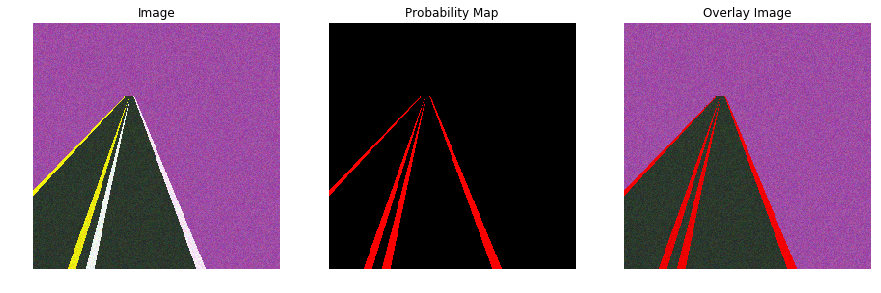

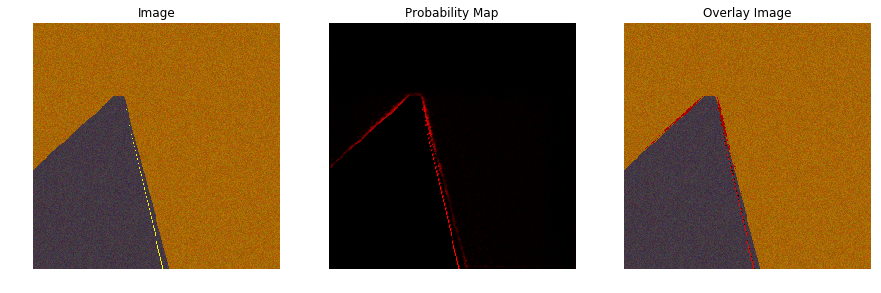

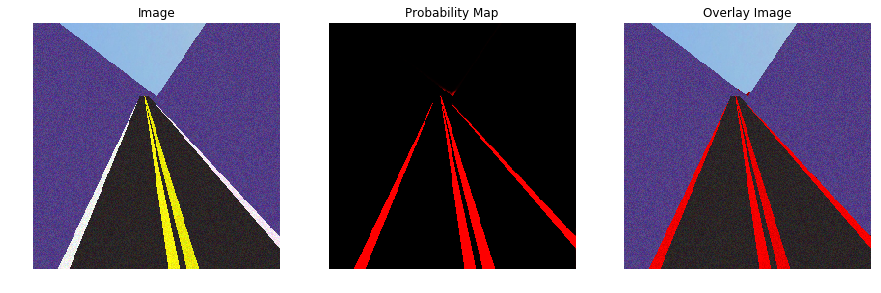

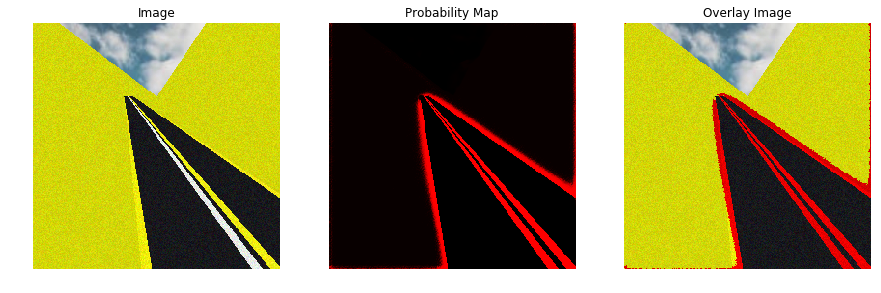

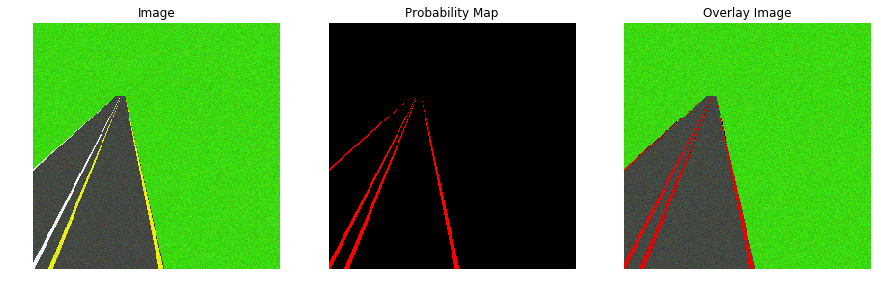

In [5]:
predict_dataset = ImageDataset(mode=Mode.PREDICT,dataset_name='TestSet10', size=10, 
                               seed=49,cfg_path=cfg_path)
predict_loader = torch.utils.data.DataLoader(dataset=predict_dataset,
                                                 batch_size=1,
                                             shuffle=False, num_workers=2)



for image, _ in predict_loader:
        model.predict(image,video_writer = None)

## Load test set containing real world no lane images and run model for prediction

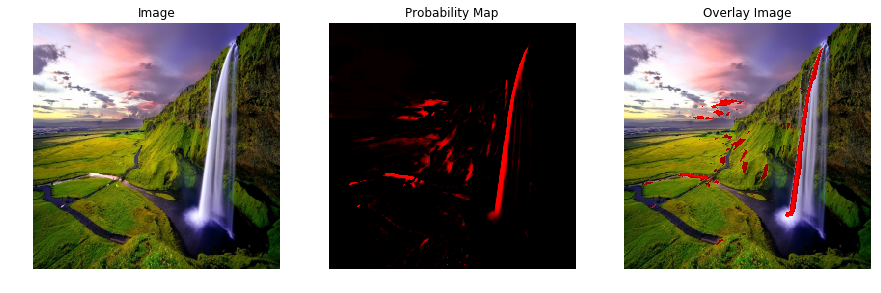

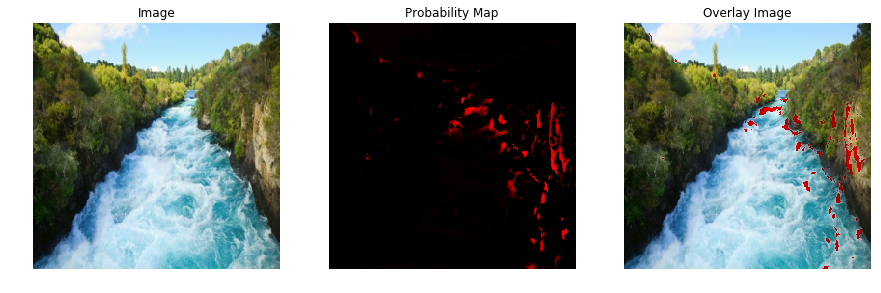

In [6]:
predict_dataset = ImageDataset(mode=Mode.PREDICT,dataset_name='Real_NoLane_Predict', 
                               size=1, seed=234L,cfg_path=cfg_path)

predict_loader = torch.utils.data.DataLoader(dataset=predict_dataset,
                                                 batch_size=1,
                                                 shuffle=False, num_workers=2)
for image, _ in predict_loader:
        model.predict(image,video_writer = None)

### Load test set containing real world lane images and run model for prediction

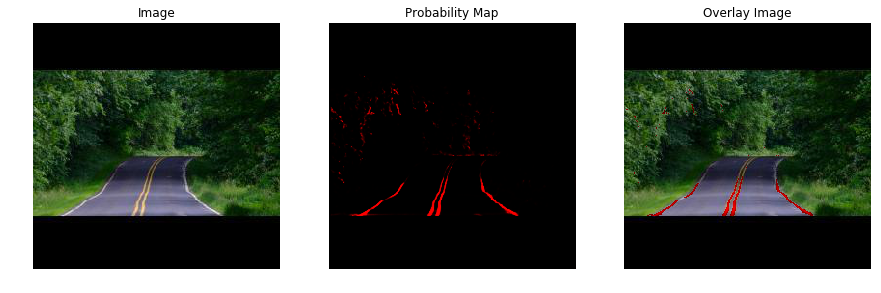

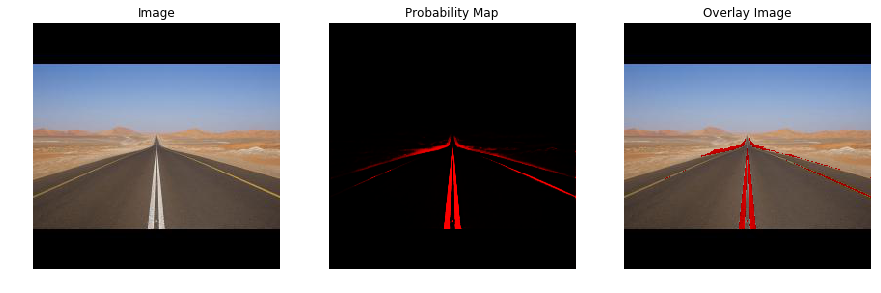

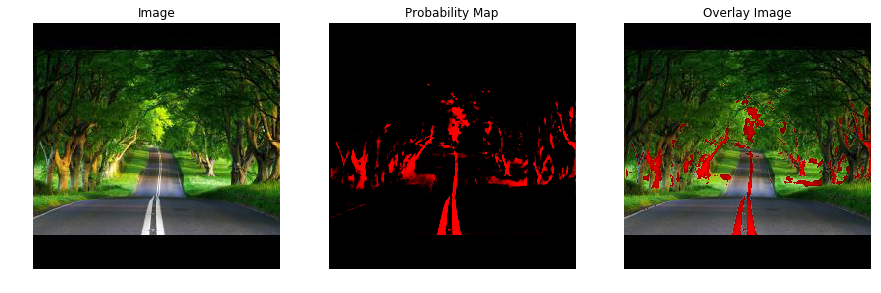

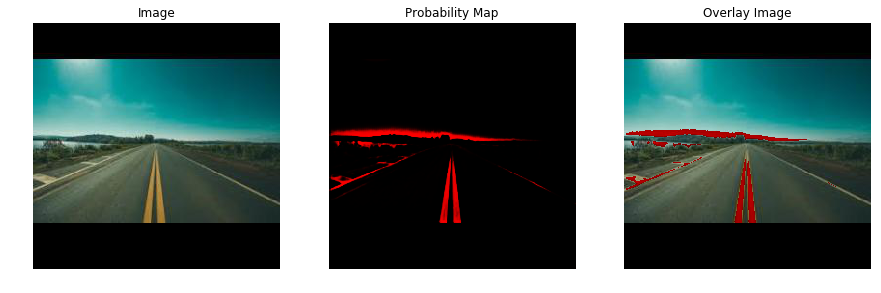

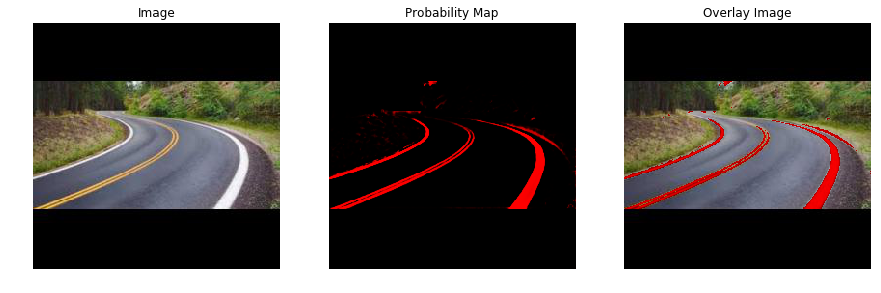

In [7]:
predict_dataset_real=ImageDataset(mode=Mode.PREDICT,dataset_name='Real_Lane_Predict', 
                                  size=1, seed=234L,cfg_path=cfg_path)

predict_loader_real = torch.utils.data.DataLoader(dataset=predict_dataset_real,
                                               batch_size=2,
                                               shuffle=False,num_workers=2)


for image, _ in predict_loader_real:
        model.predict(image,video_writer = None)
        

### Predictions for video file
A real world video from a camera mounted on a car is provided in data/input_data/Video folder. 
The below cell uses the trained model and predict() from the class Model to generate model predictions 
for the given video. The code for reading and writing the video file is provided in data/VideoDataset.py.
You are not required to make any changes to this code.

In [8]:
video_predict_dataset=VideoDataset(folder_name='Video')
#video_predict_dataset=VideoDataset()
video_loader=torch.utils.data.DataLoader(dataset=video_predict_dataset,
                                               batch_size=1,
                                               shuffle=False)

with VideoWriter(exp) as vid_writer:
    for image,_ in video_loader:
            model.predict(image,video_writer = vid_writer)
            
pth =os.path.join(exp.params['output_data_path'],'outputvideo.mp4')
play_notebook_video(pth)

/home/mlisp-1/anaconda2/envs/lab/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


done


<video controls src="./data/output_data/Combination1/outputvideo.mp4"/>